# Global Power Plant Database

In this problem we have a dataset of different factors of  power plant worldwide. We have to build a machine learning model to predict the primary fuel used in the plant and another to predict the capacity of plant.

There is two problems one is regression and another is classification.

## Loading the dataset

In [1]:
# importing required libraries
import pandas as pd   # for data wrangling
import numpy as np    # numerical python for linear algebra, handling arrays etc.
import matplotlib.pyplot as plt   # for data visualisation
import seaborn as sns             # for data visualisation
import warnings              # to detect unnecessary warnings
warnings.filterwarnings('ignore')   # this will filter and ignore unnecessary warnings

In [2]:
# loading the dataset in pandas dataframe
power_plant = pd.read_csv('power_plant_database.csv')

### Data analysis

In [3]:
# first let's see the shape of dataframe
power_plant.shape

(907, 27)

*** The dataset has 907 rows and 27 columns***

In [4]:
# as we can see the dataframe has 27 colums, it may possible that it will not show all columns when we load the dataset
# to see all columns we need to set columns option
pd.pandas.set_option('display.max_columns', None)

In [5]:
# now let's loading top 5 rows of dataframe to take a little overview of it
power_plant.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


**In the top rows we can see some columns have nan values we will check for it**

#### Data types

In [6]:
# checking data types of columns
power_plant.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

**Some columns have object data type while some have numerical data type.**

#### Null Vales

In [7]:
# checking for null values present in data
power_plant.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

Observations:
    
    1: As we have seen the total rows present in dataset is 907 and here are few columns which are totally empty i.e. nan 
    values present.
        
    2: Columns other_fuel1, other_fuel2, owner, generational_gwh from 2014 to 2018 have more than 50% nan values present in the  dataset.
        
    3: Columns other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, and estimated_generation_gwh have 100% null
    values.
        
    4: We will drop the columns with 100% nan values and check for correlation of other columns containing null values and 
    further treat them as required.

#### Unique values

In [8]:
# Let's check for unique values present in each object data type column
# In the dataset we have quite number of object column so we will make a list of object data type column
# we will use list concatenation to add object data type column in the list
obj = [i for i in power_plant.columns if power_plant[i].dtypes == 'O']

In [9]:
# let's check if object data type column is added in the list or not
obj

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'generation_data_source']

In [10]:
# now we will check for unique values using for loop 
for i in obj:
    uni = power_plant[i].nunique()
    print('There are', uni, 'unique values present in', i, 'column')

There are 1 unique values present in country column
There are 1 unique values present in country_long column
There are 907 unique values present in name column
There are 907 unique values present in gppd_idnr column
There are 8 unique values present in primary_fuel column
There are 3 unique values present in other_fuel1 column
There are 1 unique values present in other_fuel2 column
There are 280 unique values present in owner column
There are 191 unique values present in source column
There are 304 unique values present in url column
There are 3 unique values present in geolocation_source column
There are 1 unique values present in generation_data_source column


Observations:
    
    1: country and country name has only one unique value and as we have seen it has no any null values that means only one         country data present so we can drop these columns.
        
    2: There are 907 unique values present in name and gppd_idnr column and as our dataset has 907 rows that means it will 
    not provide any input to the target column as these are unique names only.
    
    3: There are only one unique value present in other_fuel2 column and as we have seen there are 906 nan values present in
    that column that means this is only one.
    
    4: There are 208 unique values present in owner column we will check its correlation with target column if it provides 
    any useful input to predict the output then we will take actions accordingly.
    
    5: There are 191 unique values present in source column we will check its correlation with target column and take
    actions accordingly.
    
    6: There are 3 unique values present in geolocation_source we will encode them.
    
    7: There are only one unique value present in generation_data_source and this column contains many nan values we will 
    take actions accordingly.

#### Statistical Summary

In [11]:
# checking statistical summary of numerical columns
summary = power_plant.describe()
summary

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


Observation:
    
    1: In most of the columns mean is greater than median means data are right skewed.
        
    2: There is huge difference between 75% and maximum value in most the columns means there is chance of outliers.
    
    3: Certain columns seems to be there is no data in that these are showing nan values for everything.

In [12]:
# checking summary of object data
obj_summary = power_plant.describe(include=['O'])
obj_summary

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source
count,907,907,907,907,907,198,1,342,907,907,888,449
unique,1,1,907,907,8,3,1,280,191,304,3,1
top,IND,India,ACME Solar Tower,WRI1020239,Coal,Oil,Oil,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
freq,907,907,1,1,258,195,1,4,519,519,765,449


Observation:
    
    1: Certain columns have not full data as the number of rows.
        
    2: Certain columns have very high number of unique values present.

#### Skewness

In [13]:
# checking skewness of numerical column data
skew = power_plant.skew()
skew

capacity_mw                 3.123576
latitude                   -0.145866
longitude                   1.112646
other_fuel3                      NaN
commissioning_year         -1.067949
wepp_id                          NaN
year_of_capacity_data       0.000000
generation_gwh_2013              NaN
generation_gwh_2014         3.342707
generation_gwh_2015         3.665904
generation_gwh_2016         3.512370
generation_gwh_2017         3.566070
generation_gwh_2018         3.476298
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
dtype: float64

**From the above data we can see there is high skewness present in data only latitude is in acceptable range but we will not rely only this we will visualise it and then handle them.**

#### Imbalance check

In [14]:
power_plant['primary_fuel'].value_counts(normalize = True)*100

Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: primary_fuel, dtype: float64

From this data we can see the majority power plants use coal and hydro as primary fuel and the other have very less as compare to them while gas, biomass, oil, nuclear have too much less so from here we can cleary observe the imbalance of our dataset. We will use over sampling technique to balance our dataset otherwise the model will be bias towards large data.

### Data Visualization

#### Distribution of data

In [15]:
# let's see the distribution of numerical column data
# first we will make a list of all numerical column and then use for loop to plot graph
# we will use list concatenation to make list of numerical column
numeric = [i for i in power_plant.columns if power_plant[i].dtypes != 'O']

Distribution of capacity_mw


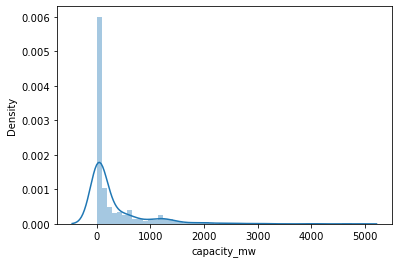



Distribution of latitude


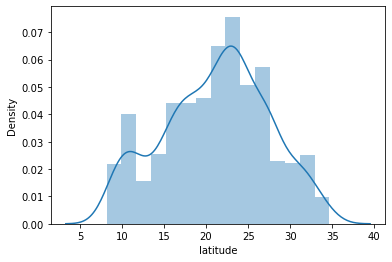



Distribution of longitude


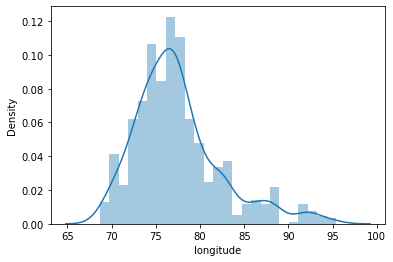



Distribution of other_fuel3


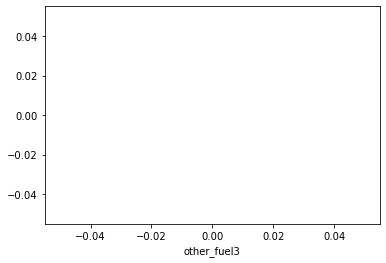



Distribution of commissioning_year


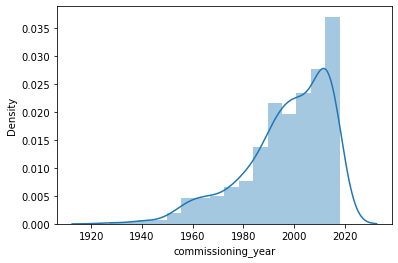



Distribution of wepp_id


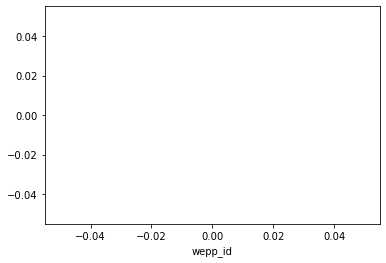



Distribution of year_of_capacity_data


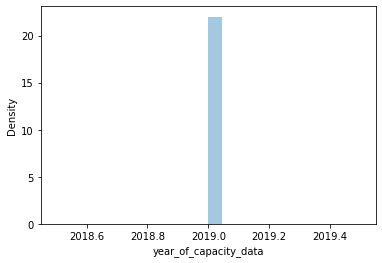



Distribution of generation_gwh_2013


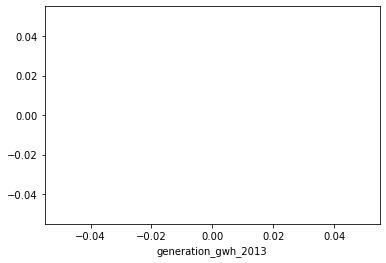



Distribution of generation_gwh_2014


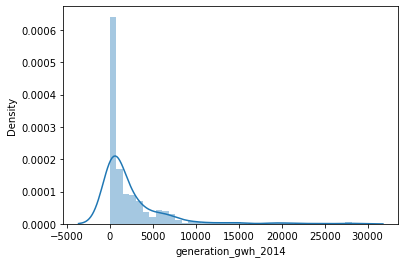



Distribution of generation_gwh_2015


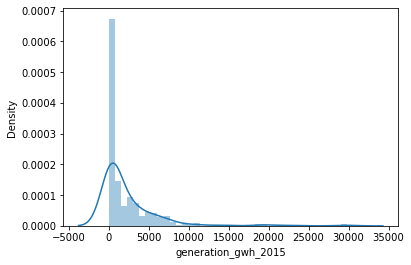



Distribution of generation_gwh_2016


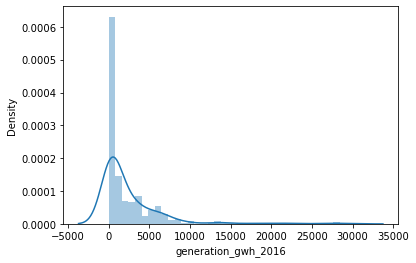



Distribution of generation_gwh_2017


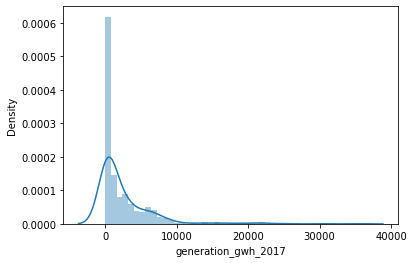



Distribution of generation_gwh_2018


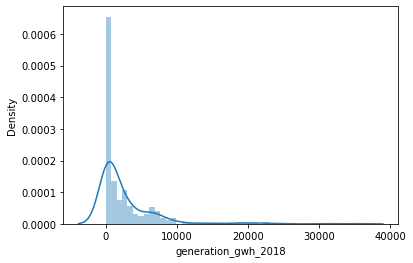



Distribution of generation_gwh_2019


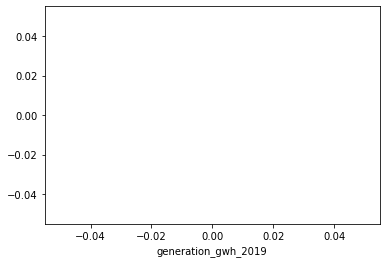



Distribution of estimated_generation_gwh


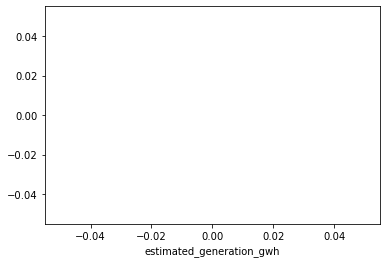

In [16]:
# now we will plot the graph of every column
# we will use for loop to plot graph and use distplot
for i in numeric:
    print('Distribution of', i)
    sns.distplot(power_plant[i])
    plt.show()
    print('\n')

Observations:
    
    1: Most of the data are right skewed.
        
    2: The capacity of most plant is nearby 100 mw there are very few plants which capacity is more than that.
        
    3: As the year increases the number of power plants also increases.
        
    4: This data is of only one year 2019 that means the data is collected in that year.
        
    5: There is not very much generation growth in power in every year.

#### Categorical features

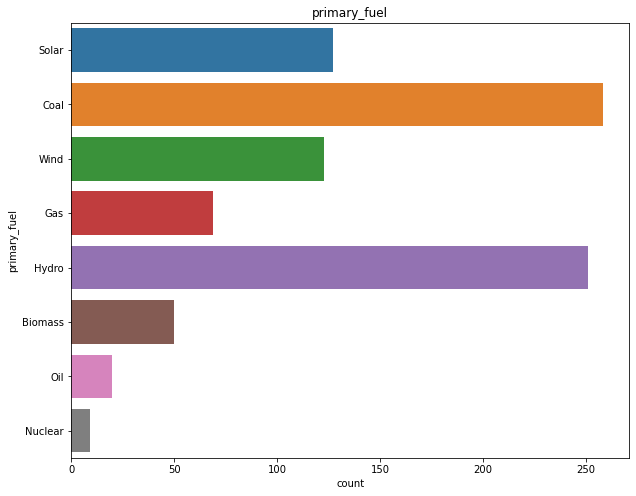

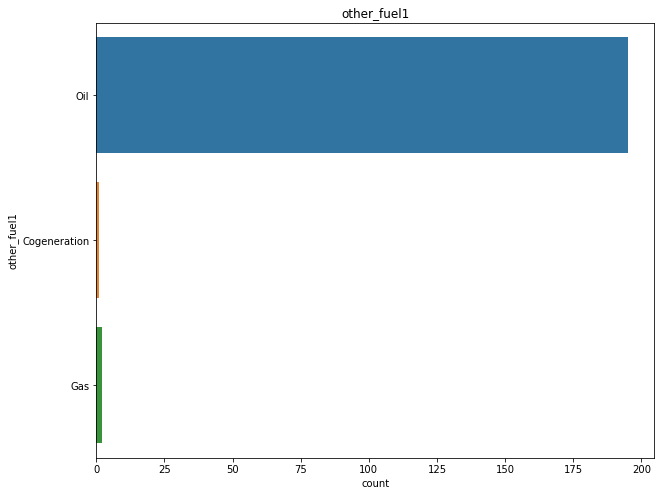

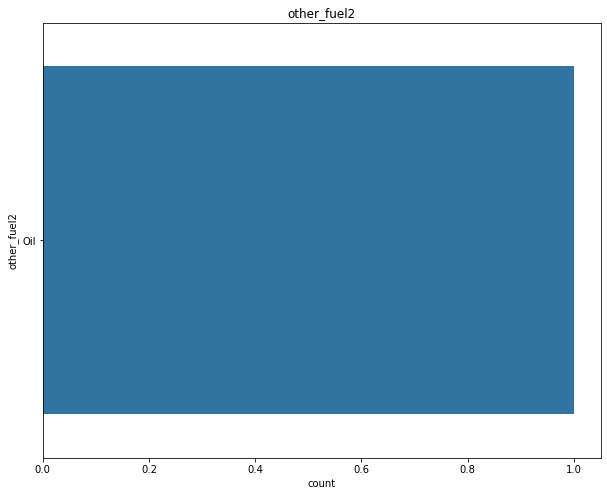

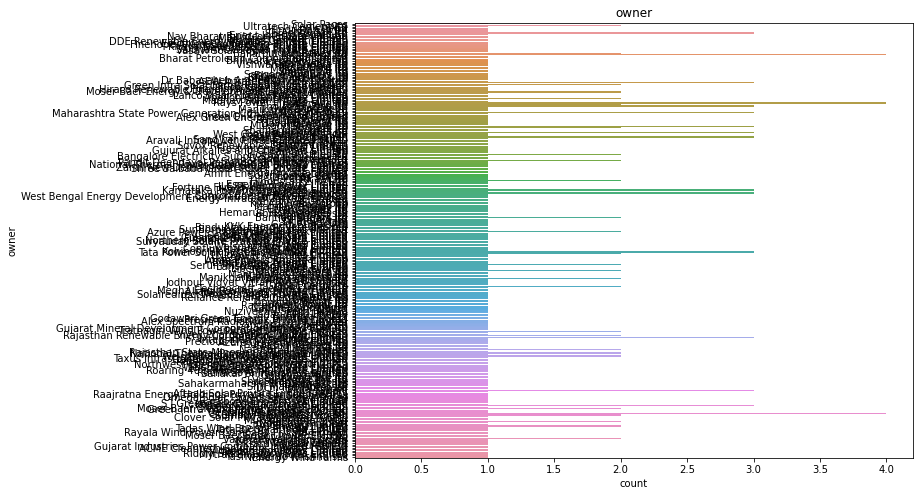

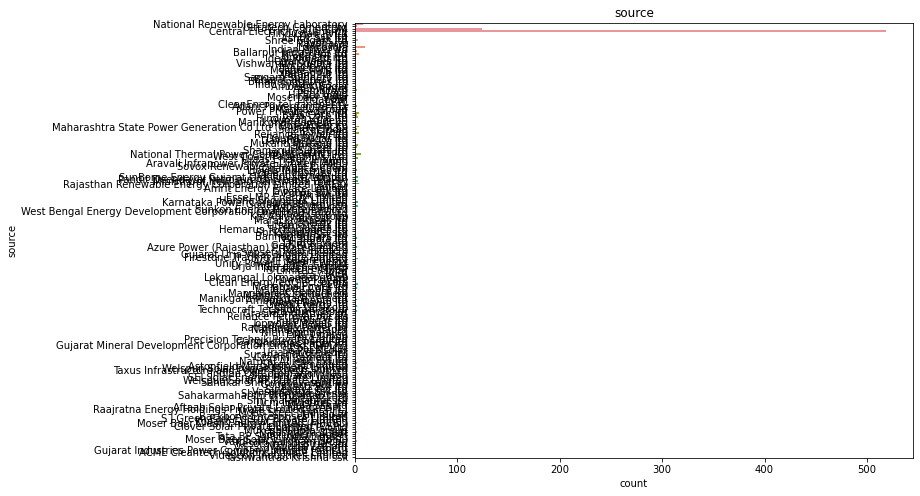

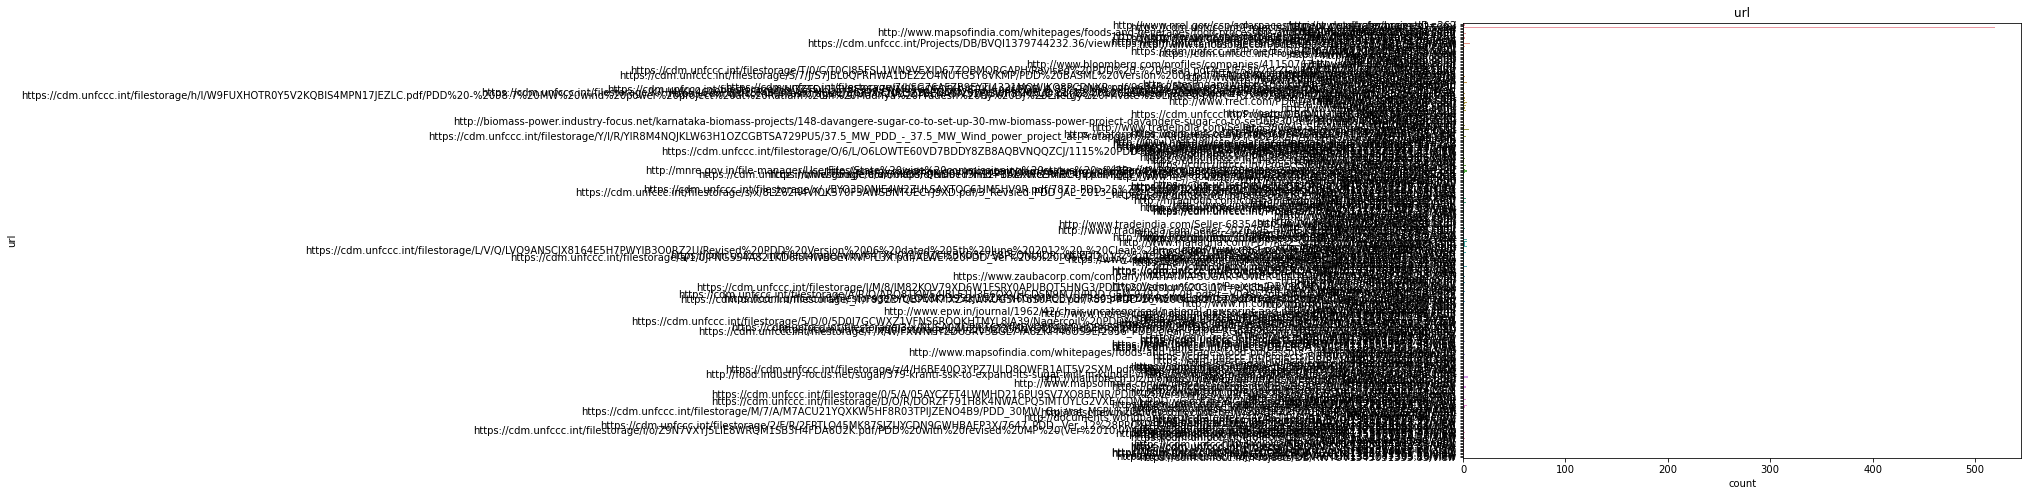

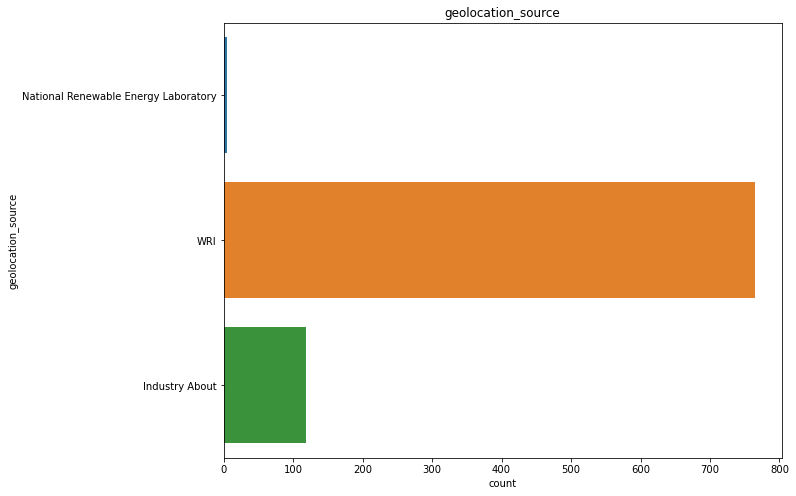

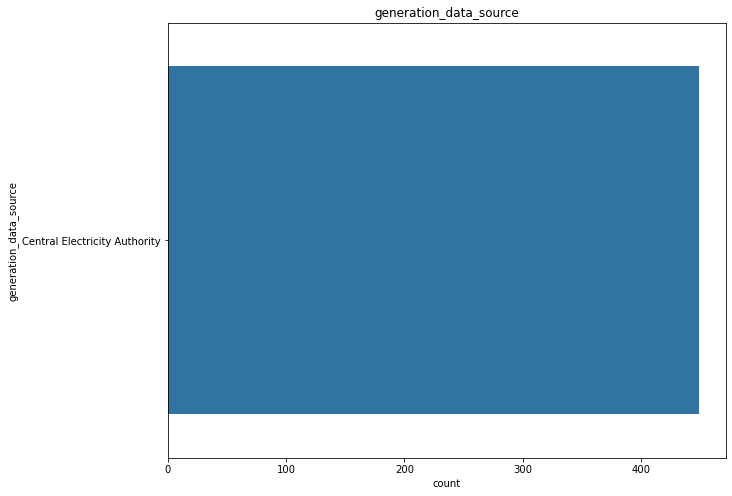

In [17]:
# we will use count plot to see the unique categorical features.
# we have already made a list of object data type column we will use for loop to plot graph
for i in obj[4:]:
    plt.figure(figsize = (10,8))
    plt.title(i)
    sns.countplot(y = i, data = power_plant)
    plt.show()

Observations:
    
    1: Most of the plants use coal or hydro i.e. water as their primary fuel.
        
    2: Oil is the first choice of alternate fuel.
        
    3: WRI is the top geolocation attribute.

#### Bivariate analysis

As we know we have to build 2 models one is for classification and one is for regression so for classification problem our target column is primary_fuel and for regression problem our target column is capacity.

**Analysis for classification problem**

Relationship between capacity_mw and primary fuel.


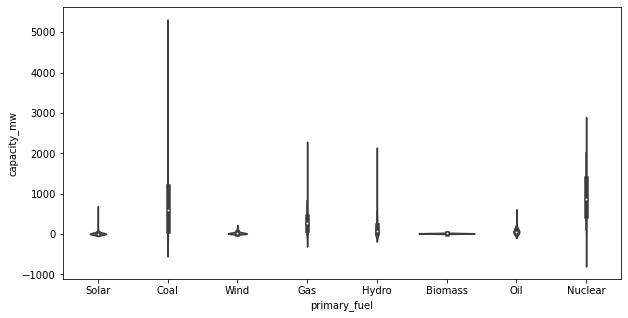



Relationship between latitude and primary fuel.


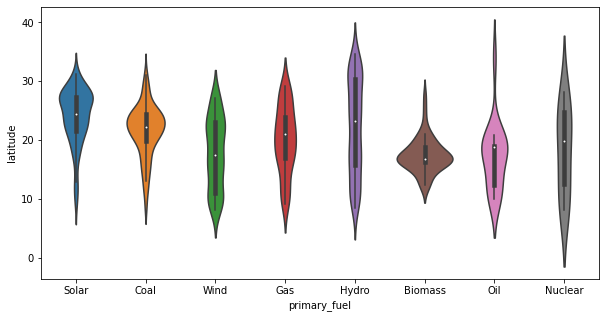



Relationship between longitude and primary fuel.


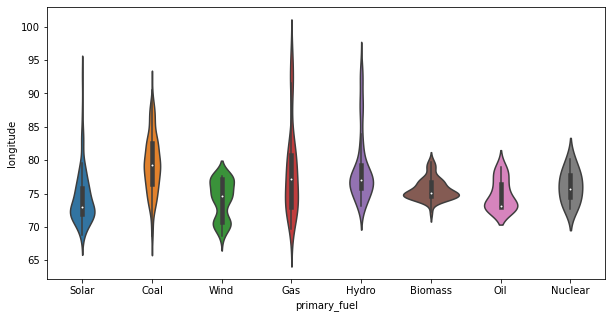



Relationship between other_fuel3 and primary fuel.


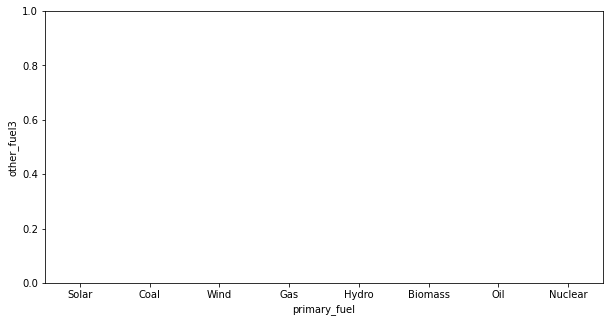



Relationship between commissioning_year and primary fuel.


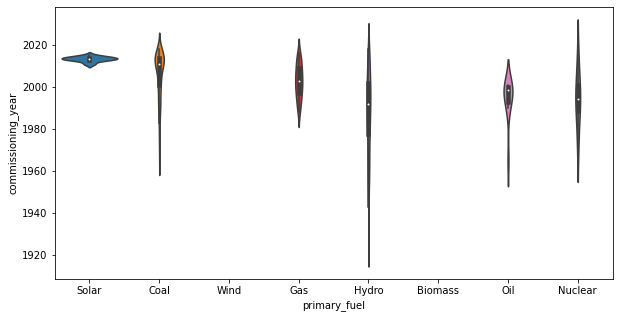



Relationship between wepp_id and primary fuel.


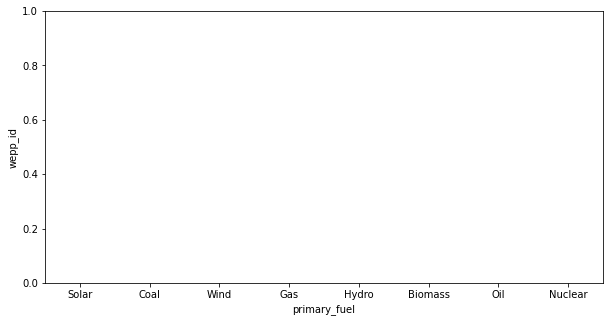



Relationship between year_of_capacity_data and primary fuel.


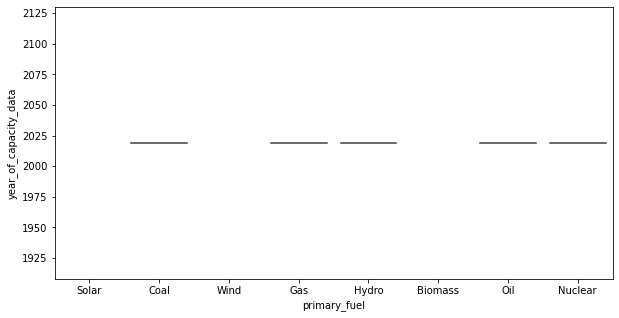



Relationship between generation_gwh_2013 and primary fuel.


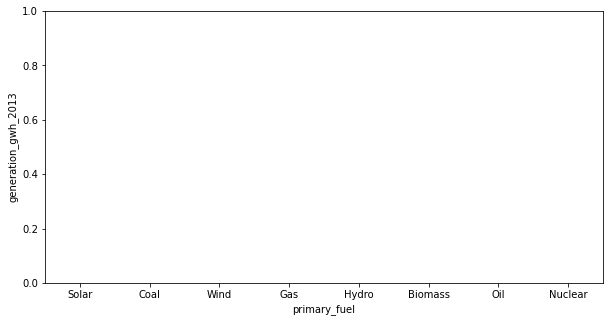



Relationship between generation_gwh_2014 and primary fuel.


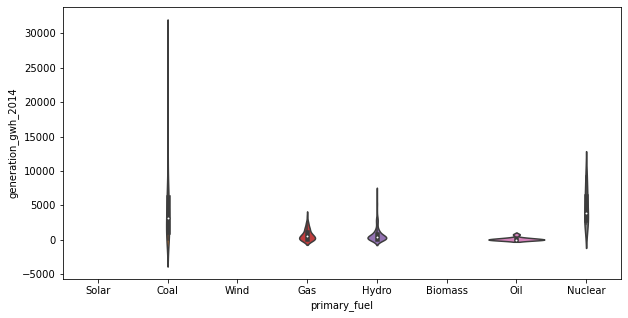



Relationship between generation_gwh_2015 and primary fuel.


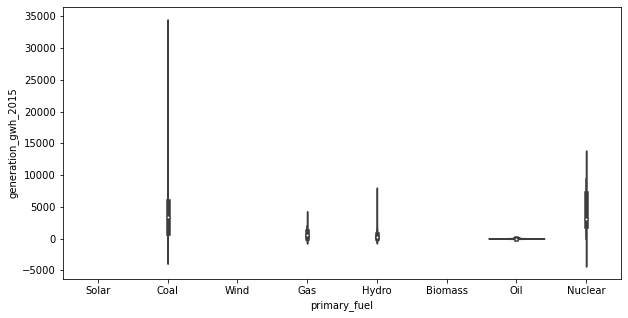



Relationship between generation_gwh_2016 and primary fuel.


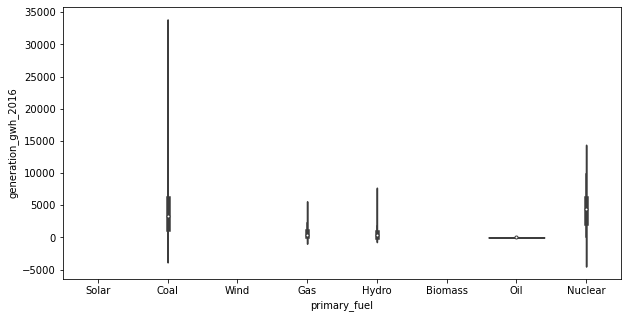



Relationship between generation_gwh_2017 and primary fuel.


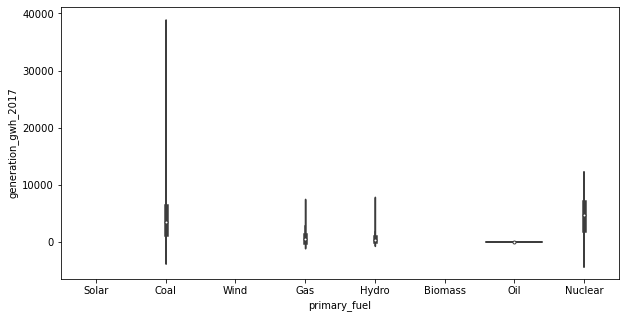



Relationship between generation_gwh_2018 and primary fuel.


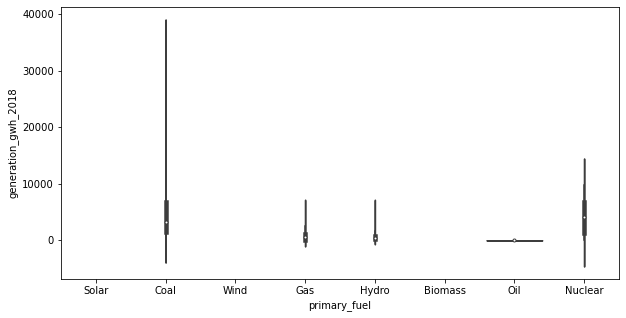



Relationship between generation_gwh_2019 and primary fuel.


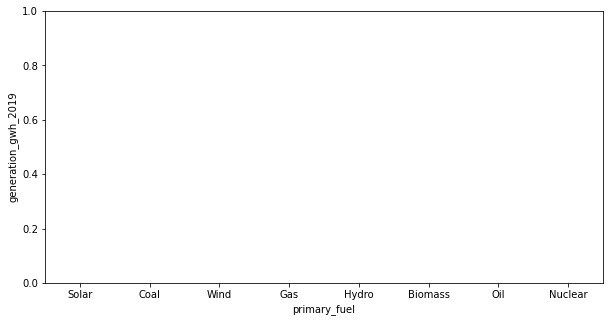



Relationship between estimated_generation_gwh and primary fuel.


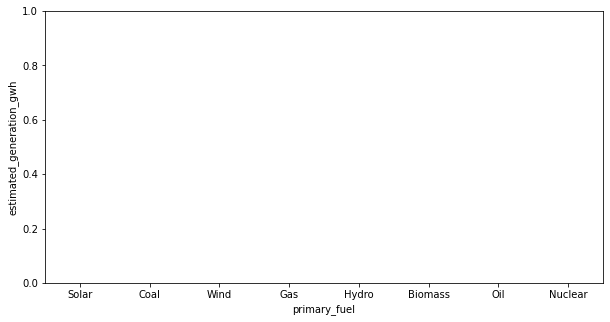

In [18]:
# first we will check the relationship between primary fuel and other numerical columns
# we will use regplot to check the relation
# we will use for loop to plot the graph
for i in numeric:
    print('Relationship between', i, 'and primary fuel.')
    plt.figure(figsize = (10,5))
    sns.violinplot(power_plant['primary_fuel'], power_plant[i])
    plt.show()
    print('\n')

Observations:
    
    1: The average capacity of all powerplants are nearby 100 to 300 mw.
        
    2: The power plant that uses water as fuel are the oldest these are the first power plant that commissioned.
        
    3: Power plant which use old, coal and nuclear as fuel started commissioned way after the hydro power plant.
        
    4: The solar power plant are the latest.

**Analysis for regression problem**

Relationship between capacity_mw and capacity


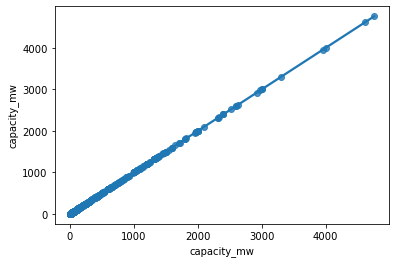



Relationship between latitude and capacity


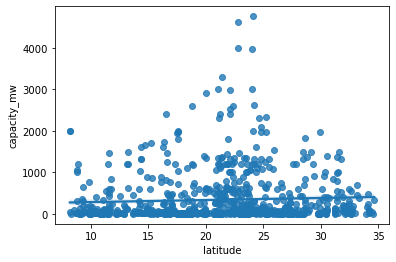



Relationship between longitude and capacity


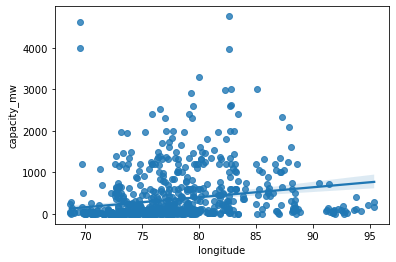



Relationship between other_fuel3 and capacity


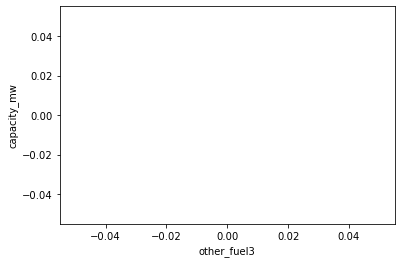



Relationship between commissioning_year and capacity


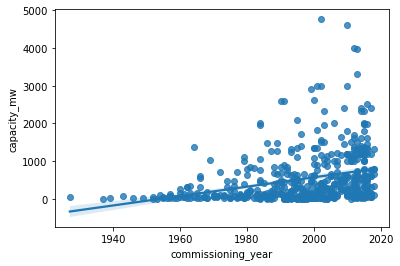



Relationship between wepp_id and capacity


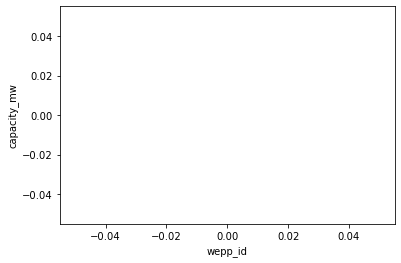



Relationship between year_of_capacity_data and capacity


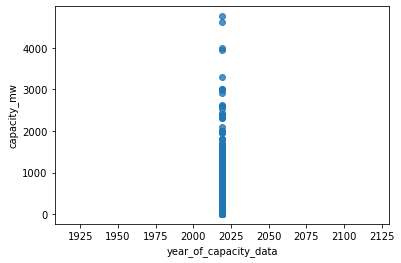



Relationship between generation_gwh_2013 and capacity


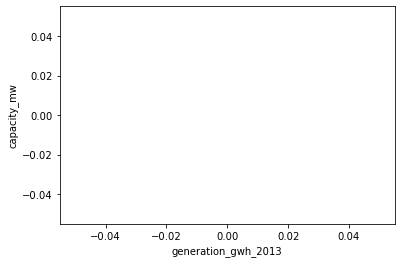



Relationship between generation_gwh_2014 and capacity


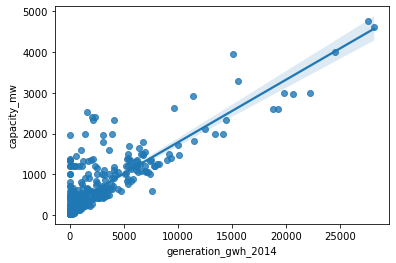



Relationship between generation_gwh_2015 and capacity


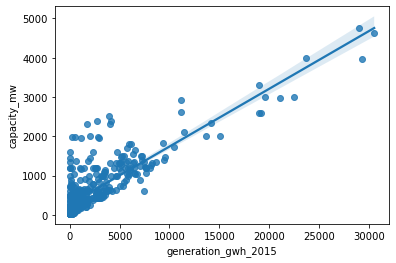



Relationship between generation_gwh_2016 and capacity


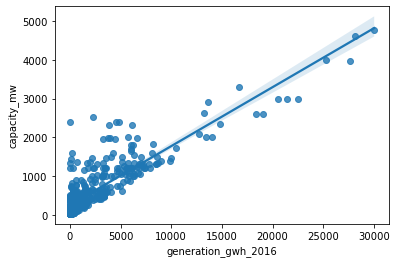



Relationship between generation_gwh_2017 and capacity


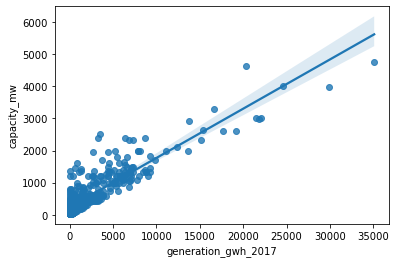



Relationship between generation_gwh_2018 and capacity


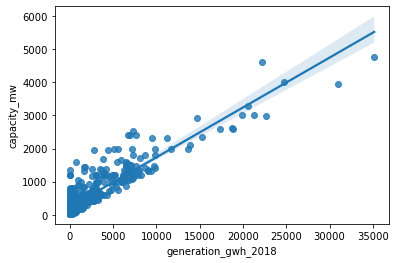



Relationship between generation_gwh_2019 and capacity


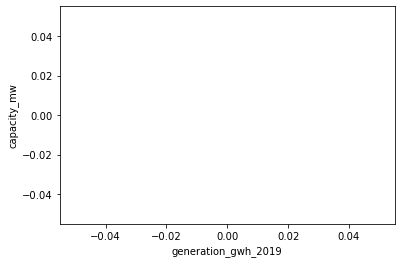



Relationship between estimated_generation_gwh and capacity


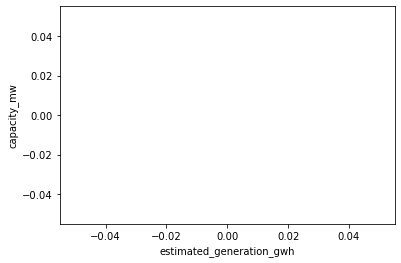

In [19]:
# let's check the relationship between capacity and other numeric data
# we will use for loop for this
# we will use regplot for this
for i in numeric:
    print('Relationship between', i, 'and capacity')
    sns.regplot(x = i, y = 'capacity_mw', data = power_plant)
    plt.show()
    print('\n')

Observations:
    
    1: As the years increase of commission of plant the capacity are more.
        
    2: The generation_gwh of years show positive correlation with capacity.

#### Correlation

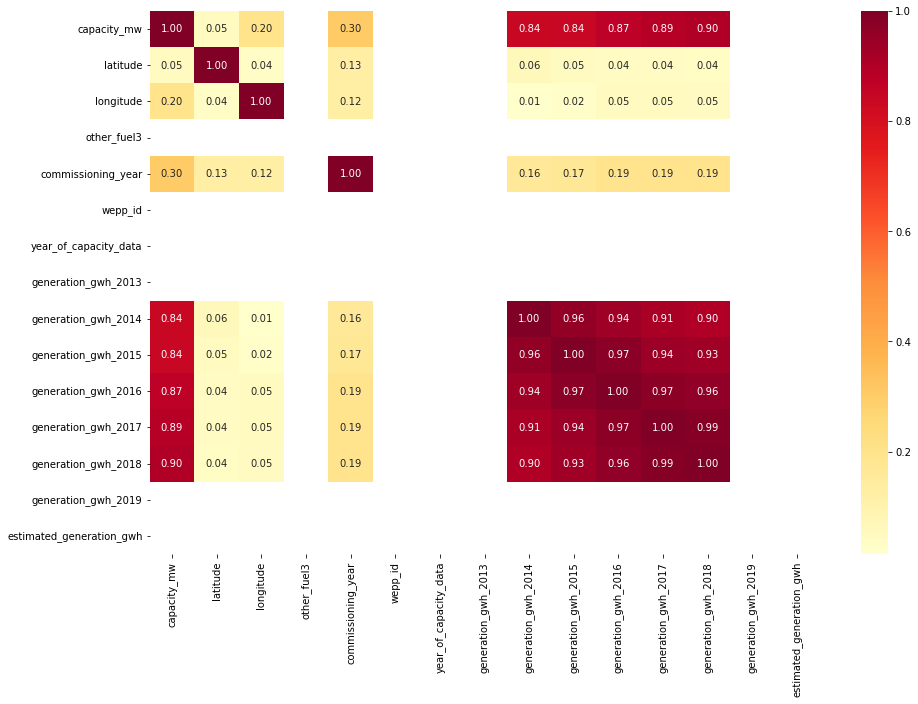

In [20]:
# checking correlation between numerical columns
# we will use heatmap to show the correlation
corr = power_plant.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'YlOrRd')
plt.show()

**Every column is showing a positive correlation with target column capacity_mw.**

**There is high correlation between some independent columns.**

### Feature Engineering

In [21]:
# before doing feature engineering we will make a copy of our dataset and do all feature engineering in this copied dataset
df = power_plant.copy()

#### Dropping columns

We will drop those columns which doesn't contains any input or weightage input data.

In [22]:
df.drop('country', axis = 1, inplace = True)
df.drop('country_long', axis = 1, inplace = True)
df.drop('name', axis = 1, inplace = True)
df.drop('gppd_idnr', axis = 1, inplace = True)
df.drop('other_fuel2', axis = 1, inplace = True)
df.drop('other_fuel3', axis = 1, inplace = True)
df.drop('wepp_id', axis = 1, inplace = True)
df.drop('generation_gwh_2013', axis = 1, inplace = True)
df.drop('generation_gwh_2019', axis = 1, inplace = True)
df.drop('estimated_generation_gwh', axis = 1, inplace = True)
df.drop('owner', axis = 1, inplace = True)
df.drop('year_of_capacity_data', axis = 1, inplace = True)
df.drop('source', axis = 1, inplace = True)
df.drop('url', axis = 1, inplace = True)

#### Filling nan values

As we have dropped many unnecessary columns which either doesn't contain any data or contain any informative data to predict output.

So, we need to fill the nan values of rest columns other wise we will not be left with any input data.

In [23]:
# filling nan values of different columns
# filling the numeric column with mean and object with mode
df['latitude'].fillna(df['latitude'].mean(), inplace = True)
df['longitude'].fillna(df['longitude'].mean(), inplace = True)
df['other_fuel1'].fillna(df['other_fuel1'].mode()[0], inplace = True)
df['commissioning_year'].fillna(df['commissioning_year'].mean(), inplace = True)
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace = True)
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace = True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace = True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace = True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace = True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean(), inplace = True)
df['generation_data_source'].fillna(df['generation_data_source'].mode()[0], inplace = True)

In [24]:
# checking null values
df.isnull().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

#### Encoding

In [25]:
# As we have replaced nan values now we will encode the categorical column
# making a list of categorical columns using list concatenation
obj_df = [i for i in df.columns if df[i].dtypes == 'O']

In [26]:
# importing library for encoding
from sklearn.preprocessing import LabelEncoder

# making instance of encoder
le = LabelEncoder()

In [27]:
# we will use for loop to encode the dataset
for i in obj_df:
    df[i] = le.fit_transform(df[i])

In [28]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,2,2011.000000,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
1,98.0,24.7663,74.6090,1,2,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
2,39.2,21.9038,69.3732,7,2,1997.091082,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,0
3,135.0,23.8712,91.3602,2,2,2004.000000,2,617.789264,843.747000,886.004428,663.774500,626.239128,0
4,1800.0,21.9603,82.4091,1,2,2015.000000,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0


**From here we can see the data is encoded.**

#### Outliers

In [29]:
# checking for outliers present in data

# importing required library
from scipy.stats import zscore

In [30]:
# finding zscore of every data and holding it into a variable z
z = np.abs(zscore(df))

In [31]:
# checking the threshold value greater than 3 and holding them into pandas dataframe in a variable outlier
threshold = 3
outlier = pd.DataFrame(np.where(z>threshold))

In [32]:
# checking total rows
outlier.shape[1]

137

**Here we can see there are total 137 rows in which outliers present at certain places.**

In [33]:
# Let's check if we delete them then how much our data will be lost
data_loss = ((907-770)/907)*100
data_loss

15.104740904079383

**We can clearly see if we remove those outliers our 15% data will be lost which is not acceptable. So, we will leave them and when we normalize our data may be that will be helpful.**

#### Over Sampling

In [34]:
# as we have seen the target column primary_fuel is imbalanced so we need to balance that
# we will use oversampling technique to balance the dataset

# importing required library
from imblearn.over_sampling import SMOTE

# making instance of it
smt = SMOTE()

In [35]:
# now first we will take input and target data in x and y variables respectively
x = df.drop('primary_fuel', axis = 1)
# as our target column is pesent in between the dataset so we have dropped that column to take only input data
y = df.iloc[ : , 3]

In [36]:
# checking shape of input and target data
print('Input data shape', x.shape)
print('Target data shape', y.shape)

Input data shape (907, 12)
Target data shape (907,)


In [37]:
# now passing input and target data for balancing the dataset
x_in, y_out = smt.fit_resample(x,y)

In [38]:
# checking shape of input and target data after doing oversampling
print('Input data shape', x_in.shape)
print('Target data shape', y_out.shape)

Input data shape (2064, 12)
Target data shape (2064,)


In [39]:
# checking the values of all different categorical features of target data
y_out.value_counts()

6    258
1    258
7    258
2    258
3    258
0    258
5    258
4    258
Name: primary_fuel, dtype: int64

**Here we can see now our dataset is balanced.**

#### Skewness

In [40]:
# as we have checked earlier there is skewness present in our data so now we will handle the skewness

# checking skewness of input data and sorting it into descending order
x_in.skew().sort_values(ascending = False)

generation_gwh_2015       5.294888
generation_gwh_2014       4.874422
generation_gwh_2016       4.763905
generation_gwh_2017       4.757383
generation_gwh_2018       4.746573
capacity_mw               2.720514
longitude                 1.508213
latitude                  0.051209
generation_data_source    0.000000
commissioning_year       -1.563296
geolocation_source       -2.338106
other_fuel1              -7.838837
dtype: float64

**Here we can see the highest skewness is 5.20 and lowest is -7.37 but ideally every column skewness should 0, inspite of this we know that it is not possible so we will transform the data and try to make it close to 0.**

In [41]:
# importing library to handle the distribution of data
from sklearn.preprocessing import power_transform, PowerTransformer

In [42]:
# we will use PowerTransformer method holding it into an instance
pt = PowerTransformer()

In [43]:
# passing input data to transform
new_x = pt.fit_transform(x_in)
# this will provide output in numpy array format

# holding the output in pandas dataframe
inp_x = pd.DataFrame(new_x, columns = x_in.columns)

In [44]:
# checking skewness of data
inp_x.skew()

capacity_mw               0.030972
latitude                 -0.044361
longitude                 0.000000
other_fuel1              -7.377682
commissioning_year        0.105479
geolocation_source       -2.310598
generation_gwh_2014      -0.021350
generation_gwh_2015      -0.068159
generation_gwh_2016      -0.211872
generation_gwh_2017      -0.181425
generation_gwh_2018      -0.256603
generation_data_source    0.000000
dtype: float64

**From here we can see all the numerical variables distribution are handled and these are now comes in acceptable range. The -6 and -2 are from categorical column which we have encoded.**

#### Scaling the data

In [45]:
# we will use standard scaler to scale our data

# importing require library
from sklearn.preprocessing import StandardScaler

# holding it into an instance
ssc = StandardScaler()

In [46]:
# applying scaling to input data
scaled = ssc.fit_transform(inp_x)

# this will give output in numpy array format 

# making pandas dataframe of output
input_x = pd.DataFrame(scaled, columns = inp_x.columns)

**Now our data is ready for model training.**

### Model Building -- Classification problem

**As we have splitted our data first we will train classification model.**

In [47]:
# importing classification algorithms and validation matrics

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [48]:
# making instance of every model
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()

#### Random State

In [65]:
# first we will find the best random state to split our data

max_acc = 0
# making a variable max_acc and initialising it with 0 we will store the maximum accuracy in it
best_rs = 0
# making a variable best_rs and initialising it with 0 we will store the best random state in it for which maximum accuracy is 
# achieved

# using a for loop to split data into 100 different random states
for i in range(1,101):
    x_train, x_test, y_train, y_test = train_test_split(input_x, y_out, test_size = 0.25, random_state = i )
    # taking 25% data for testing
    
    # using DecisionTreeClassifier
    dtc.fit(x_train, y_train)
    
    # making prediction on test data
    pred = dtc.predict(x_test)
    
    # checking accuracy
    accuracy = accuracy_score(pred, y_test)
    
    print('At random state', i, 'accuracy score is', accuracy)
    
    
    # using if condition to store the best accuracy and random state
    if accuracy>max_acc:
        max_acc = accuracy
        best_rs = i
    
print('Maximum accuracy is', max_acc,'and best random state is', best_rs)

At random state 1 accuracy score is 0.8798449612403101
At random state 2 accuracy score is 0.874031007751938
At random state 3 accuracy score is 0.8682170542635659
At random state 4 accuracy score is 0.8604651162790697
At random state 5 accuracy score is 0.8507751937984496
At random state 6 accuracy score is 0.8624031007751938
At random state 7 accuracy score is 0.8895348837209303
At random state 8 accuracy score is 0.872093023255814
At random state 9 accuracy score is 0.8449612403100775
At random state 10 accuracy score is 0.8837209302325582
At random state 11 accuracy score is 0.8701550387596899
At random state 12 accuracy score is 0.875968992248062
At random state 13 accuracy score is 0.8255813953488372
At random state 14 accuracy score is 0.874031007751938
At random state 15 accuracy score is 0.8410852713178295
At random state 16 accuracy score is 0.8585271317829457
At random state 17 accuracy score is 0.877906976744186
At random state 18 accuracy score is 0.8488372093023255
At ran

**Here we have done all the training internally using for loop and find the best random state to split our data.**

#### Data Splitting

In [66]:
# now we will split our data at random state 69
x_train, x_test, y_train, y_test = train_test_split(input_x, y_out, test_size = 0.25, random_state = 69)

In [67]:
# our data is splitted now 
# let's check the shape of training and testing data
print('Input training data shape is', x_train.shape)
print('Target training data shape is', y_train.shape)
print('Input test data shape is', x_test.shape)
print('Target test data shape is', y_test.shape)

Input training data shape is (1548, 12)
Target training data shape is (1548,)
Input test data shape is (516, 12)
Target test data shape is (516,)


In [68]:
# Now we will train different classification models and check the accuracy score of all models then select the best model

# making a list of all models
model = [svc, dtc, knn, rfc, gnb]

# using for loop to train all models

for model in model:
    model.fit(x_train, y_train)
    
    # making predictions
    pred = model.predict(x_test)
    
    # checking accuracy score
    accuracy = accuracy_score(pred, y_test)
    
    # confusion matrix
    cnf_matrix = confusion_matrix(pred, y_test)
    
    # classification report
    clf_report = classification_report(pred, y_test)
    
    print('Evaluation of model', model,':')
    print('Accuracy score:', accuracy)
    print('Confusion matrix:\n', cnf_matrix)
    print('Classification report\n', clf_report)
    print('\n\n')

Evaluation of model SVC() :
Accuracy score: 0.7693798449612403
Confusion matrix:
 [[71  5  1 12  0  3  0 29]
 [ 0 35  4  6  0  4  2  1]
 [ 0  4 46 10  0  0  0  0]
 [ 0  1  1 45  0  0  0  0]
 [ 0  8  3  2 58  0  0  0]
 [ 0  0 10  1  0 61  0  6]
 [ 0  0  0  0  0  0 48  0]
 [ 0  3  0  2  0  1  0 33]]
Classification report
               precision    recall  f1-score   support

           0       1.00      0.59      0.74       121
           1       0.62      0.67      0.65        52
           2       0.71      0.77      0.74        60
           3       0.58      0.96      0.72        47
           4       1.00      0.82      0.90        71
           5       0.88      0.78      0.83        78
           6       0.96      1.00      0.98        48
           7       0.48      0.85      0.61        39

    accuracy                           0.77       516
   macro avg       0.78      0.80      0.77       516
weighted avg       0.83      0.77      0.78       516




Evaluation of model Deci

**From the above observation of different models evaluation we can see the model DecisionTree and RandomForest are performing better. From both RandomForest is giving highest accuracy so we will go ahead with that model.**

#### Model Training

As we have seen the RandomForestClassifier is performing best so we will train that model.

In [69]:
# training model
rfc.fit(x_train, y_train)

RandomForestClassifier()

#### Prediction and Errors

In [70]:
# making prediction from model
predict = rfc.predict(x_test)

In [71]:
# checking accuracy score of model
print('Accuracy score:', accuracy_score(predict, y_test))

Accuracy score: 0.9108527131782945


**The accuracy is 91%.**

In [72]:
# printing confusion matrix of model
print('Confusion Matrix:\n', confusion_matrix(predict, y_test))

Confusion Matrix:
 [[67  0  0  0  0  0  0  6]
 [ 1 44  2  5  0  1  0  0]
 [ 0  5 56  6  0  0  0  0]
 [ 0  2  1 65  0  0  0  0]
 [ 0  4  0  1 58  0  0  0]
 [ 0  0  6  1  0 68  0  1]
 [ 0  0  0  0  0  0 50  0]
 [ 3  1  0  0  0  0  0 62]]


**From here we can see the diagonal of matrix most number of predictions are correct there are very few at false positive and false negative.**

In [73]:
# checking classification report
print('Classification report:\n', classification_report(predict, y_test))

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        73
           1       0.79      0.83      0.81        53
           2       0.86      0.84      0.85        67
           3       0.83      0.96      0.89        68
           4       1.00      0.92      0.96        63
           5       0.99      0.89      0.94        76
           6       1.00      1.00      1.00        50
           7       0.90      0.94      0.92        66

    accuracy                           0.91       516
   macro avg       0.91      0.91      0.91       516
weighted avg       0.91      0.91      0.91       516



**Here we can see the overall accuray of model is 91%**

#### Model Evaluation

**cross validation of model**

In [74]:
# importing required model
from sklearn.model_selection import cross_val_score

In [75]:
# using for loop to split data at different cross folds
for i in range(2,20):
    score = cross_val_score(rfc, input_x, y_out, cv = i )
    mean_score = score.mean()
    print('At cross fold', i,'mean score is', mean_score)

At cross fold 2 mean score is 0.8827519379844961
At cross fold 3 mean score is 0.8987403100775193
At cross fold 4 mean score is 0.8958333333333333
At cross fold 5 mean score is 0.9050365546909894
At cross fold 6 mean score is 0.9050387596899226
At cross fold 7 mean score is 0.9030949910230436
At cross fold 8 mean score is 0.9050387596899225
At cross fold 9 mean score is 0.9060207159884395
At cross fold 10 mean score is 0.9035973922423903
At cross fold 11 mean score is 0.9064921027317204
At cross fold 12 mean score is 0.9040697674418605
At cross fold 13 mean score is 0.9137531921147874
At cross fold 14 mean score is 0.9094272844272844
At cross fold 15 mean score is 0.9113544201135441
At cross fold 16 mean score is 0.9064922480620156
At cross fold 17 mean score is 0.9089474565059732
At cross fold 18 mean score is 0.912823120603441
At cross fold 19 mean score is 0.9113373392707048


**From here we can see at different cross folds there is not much difference between the mean score and model accuracy score it is about 0.01 or 0.02 which is very less so we can say that our model is neither underfitting nor overfitting it is performing well.**

#### Hyperparameter tuning

Let's see if there is improvement in performance of model at different parameters.

In [76]:
# importing required libraries
from sklearn.model_selection import GridSearchCV

In [77]:
# making a dictionary of parameters
params = {'n_estimators':[100,200,300,400,500], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2']}

# making instance for tuning 
gsv = GridSearchCV(estimator = rfc, param_grid = params)

In [78]:
# sending data for training
gsv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [79]:
# finding best parameter and that accuracy
print('Best Parameter:', gsv.best_params_)
print('Best score:', gsv.best_score_)

Best Parameter: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 300}
Best score: 0.8966489195114313


**We can see that the best score of model at best parameter is 89% while our model itself is giving 91% accuracy. So, we will save that model as it is.**

### Saving model

In [80]:
# importing required library
import joblib

In [82]:
# saving model into it
joblib.dump(rfc, 'power_plant_fuel.obj')

['power_plant_fuel.obj']

### Loading the model

In [83]:
fuel = joblib.load('power_plant_fuel.obj')

In [84]:
# passing data and making prediction from model
pred = fuel.predict(x_test)

In [85]:
# checking accuracy score
accuracy = accuracy_score(pred, y_test)
accuracy

0.9108527131782945

In [86]:
# making dataframe of predictions
pd.DataFrame([fuel.predict(x_test)[:], y_test[:]],index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515
Predicted,7,3,7,3,0,4,2,1,2,0,0,2,0,5,2,1,3,7,1,7,7,1,0,5,7,0,0,5,0,2,7,6,1,6,3,2,5,3,5,4,3,2,3,0,4,0,6,6,5,0,7,5,7,0,3,4,2,4,5,0,3,6,4,2,1,5,2,5,5,2,3,1,4,4,7,0,2,1,5,2,6,1,1,5,2,7,3,7,4,5,6,7,4,2,6,4,7,2,0,3,7,0,5,4,3,0,2,3,7,0,6,7,4,1,7,7,5,2,3,0,3,6,3,6,2,2,7,0,1,0,0,7,4,7,3,2,4,2,7,5,4,4,3,3,0,4,2,5,7,4,1,2,0,1,5,3,2,5,4,4,3,4,3,4,7,5,2,6,7,0,1,6,5,1,5,2,1,1,5,3,2,2,0,4,5,3,0,4,2,0,4,6,6,0,5,2,7,2,2,5,6,5,0,5,2,5,7,0,5,7,1,3,1,2,6,5,6,7,3,7,0,6,5,0,3,1,5,6,2,7,7,4,0,0,0,6,3,6,0,4,7,6,6,0,7,2,1,1,3,7,1,6,3,1,3,2,5,7,5,6,3,1,3,6,4,4,7,5,5,4,7,0,0,4,1,5,4,2,5,0,0,3,1,3,4,1,7,7,1,2,3,0,6,3,2,5,6,7,6,3,3,0,4,2,3,2,7,4,2,7,6,1,7,1,2,3,6,5,3,4,6,6,7,6,0,4,7,6,4,1,4,4,3,5,2,5,1,2,3,6,0,3,3,5,2,7,6,7,3,5,0,7,6,4,5,4,5,5,1,0,4,5,0,2,4,3,0,5,1,1,0,4,0,0,2,4,1,6,0,4,6,7,2,0,0,3,4,2,0,5,7,5,7,1,5,5,4,3,0,5,3,0,3,3,3,5,6,1,4,0,6,3,1,6,7,3,1,5,7,5,2,5,1,2,3,7,3,2,5,1,4,3,1,5,0,2,1,0,6,5,7,5,5,4,7,1,4,4,2,7,0,0,7,2,0,3,0,4,3,5,4,3,1,0,2,6,0,6,4,7,4,7,0,3,2,5,5,2,4,4,2,3,0,7,7,0,5,1,5,3,1,1,5,5,6,1,5,5,2,2,3,2,4,2,6,2,7,6,0,0,4,7,1,5,5,3
Original,7,3,7,3,0,4,2,1,2,0,0,2,0,5,2,1,3,7,2,7,7,1,0,5,7,0,0,5,0,2,7,6,1,6,3,2,5,3,5,1,3,2,3,0,4,0,6,6,5,0,7,5,7,0,3,4,2,4,5,0,3,6,4,3,1,5,2,5,5,2,3,1,4,4,7,0,2,1,5,2,6,1,1,5,2,7,3,1,1,5,6,0,4,2,6,4,7,2,0,3,7,0,2,1,3,0,2,3,7,0,6,7,4,1,7,7,5,2,3,0,3,6,3,6,3,2,7,7,1,7,0,7,4,7,3,2,4,1,7,5,4,4,3,3,0,4,1,5,7,4,1,2,0,1,5,3,2,5,4,4,3,4,3,4,7,5,2,6,7,7,1,6,5,1,5,2,1,1,5,3,2,2,0,4,5,3,0,4,2,0,4,6,6,0,5,2,7,1,2,5,6,5,0,5,2,5,7,0,5,7,1,3,1,2,6,5,6,7,3,7,0,6,5,0,3,1,5,6,2,7,7,4,0,0,0,6,3,6,0,4,7,6,6,0,7,2,1,1,1,7,1,6,3,3,3,3,5,7,5,6,3,1,3,6,4,4,0,5,5,4,7,0,0,4,1,5,4,2,5,0,0,3,0,1,4,1,7,7,1,2,3,0,6,3,2,5,6,7,6,3,3,0,4,2,3,2,7,4,2,7,6,1,7,1,2,3,6,5,3,4,6,6,7,6,0,4,7,6,4,3,4,1,3,5,2,5,1,2,3,6,0,3,3,5,2,0,6,7,3,5,7,7,6,4,2,4,5,2,1,0,4,5,7,2,4,3,0,5,1,1,0,4,0,0,2,4,1,6,0,4,6,7,2,0,0,3,4,2,0,3,7,5,7,1,5,5,4,3,0,5,3,0,3,3,3,5,6,1,4,0,6,2,1,6,7,3,1,5,7,5,2,7,1,2,3,7,3,2,5,3,4,3,5,5,0,2,3,0,6,5,7,5,5,4,7,1,3,4,2,7,0,0,7,3,7,3,0,4,3,2,4,3,3,0,3,6,0,6,4,7,4,7,0,3,1,5,5,1,4,4,3,3,0,7,7,0,5,2,5,3,1,1,5,2,6,1,2,

**From here we can clearly observe that the model is working very well.**

### Regression problem

For regression problem the capacity_mw column will be our target variable.

As we have already done the analysis for both classification and regression we will split the data and do some feature engineering then train our model.

As we have already done some feature engineering so now we will only do the necessary steps for regression problem.

In [90]:
# splitting the input and target data in and holding them in variables x1 and y1 respectively
x1 = df.iloc[ : , 1:]
y1 = df.iloc[ : , 0]

#### Skewness

In [93]:
# checking skewness of input data
x1.skew()

latitude                  -0.149698
longitude                  1.141881
primary_fuel               0.472251
other_fuel1              -20.453120
commissioning_year        -1.399359
geolocation_source        -2.159841
generation_gwh_2014        5.035446
generation_gwh_2015        5.364134
generation_gwh_2016        5.068427
generation_gwh_2017        5.110952
generation_gwh_2018        4.937907
generation_data_source     0.000000
dtype: float64

In [94]:
# handling the skewness

# importing library to handle the distribution of data
from sklearn.preprocessing import PowerTransformer

In [95]:
# making instance of it
pt = PowerTransformer()

In [99]:
# passing input data to transform and holding the output in a variable
normal = pt.fit_transform(x1)

# as we know this will give output in numpy array format so holding it into pandas dataframe
x1_in = pd.DataFrame(normal, columns = x1.columns)

In [101]:
# checking skewness of this data
x1_in.skew()

latitude                  -0.074269
longitude                  0.002926
primary_fuel              -0.047067
other_fuel1              -17.330022
commissioning_year        -0.080999
geolocation_source        -2.132728
generation_gwh_2014        0.123226
generation_gwh_2015        0.074582
generation_gwh_2016        0.041821
generation_gwh_2017        0.018337
generation_gwh_2018        0.000783
generation_data_source     0.000000
dtype: float64

**Here we can see the skewness of data is handled.**

#### Scaling the input data

In [102]:
# importing require library
from sklearn.preprocessing import StandardScaler

# holding it into an instance
s_scaler = StandardScaler()

In [104]:
# passing input data to it and holding the output into a variable
scaled = s_scaler.fit_transform(x1_in)

# this will give the output in numpy array format making a pandas dataframe of this data
input_x1 = pd.DataFrame(scaled, columns = x1_in.columns)

**Now our data is scaled and ready to go for model training.**

### Model Training -- Regression problem

In [158]:
# importing required libraries

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [159]:
# making instance of all models
lr = LinearRegression()
svr = SVR()
dtr = DecisionTreeRegressor()
knr = KNeighborsRegressor()
rfr = RandomForestRegressor()

#### Selecting best random state

In [160]:
# first we will select best random state to split our data we will use KNeighborsRegressor model for this
best_score = 0
# making a variable to store best score of model and inititalising it with 0
rs = 0
# making a variabel to store random state for which model gives best score and initializing it with 0

# using for loop to select random state
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(input_x1, y1, test_size = 0.20, random_state = i)
    # we will take 20% data for testing
    
    # sending training data to model
    knr.fit(x_train, y_train)
    
    # making predictions on test data
    test_pred = knr.predict(x_test)
    
    # Checking r2 score
    test_accuracy = r2_score(test_pred, y_test)
    
    # using if condition to store best score into variable
    if test_accuracy>best_score:
        best_score = test_accuracy
        rs = i
print('Best r2_score is:', best_score, 'at random state:', rs)

Best r2_score is: 0.9008983537004199 at random state: 96


**From here we can see best r2_score is 90% at random state 96. We will split our data at random state 96.**

#### Data Splitting

In [161]:
# splitting data at best random state
x_train, x_test, y_train, y_test = train_test_split(input_x1, y1, test_size = 0.20, random_state = 96)

In [162]:
# checking shape of training and testing data
print('Shape of input training data:', x_train.shape)
print('Shape of input test data:', x_test.shape)
print('Shape of target training data:', y_train.shape)
print('Shape of target test data:', y_test.shape)

Shape of input training data: (725, 12)
Shape of input test data: (182, 12)
Shape of target training data: (725,)
Shape of target test data: (182,)


#### Model Training

In [163]:
# we will make a list of models and train then one by one then select best model from them
models = [lr, svr, dtr, knr, rfr]

# using for loop to train models
for model in models:
    model.fit(x_train, y_train)
    
    # making prediction on test data
    pred_test = model.predict(x_test)
    
    # checking r2_score
    score = r2_score(pred_test, y_test)
    
    # checking mean absolute error
    mae = mean_absolute_error(pred_test, y_test)
    
    # checking mean squared error
    mse = mean_squared_error(pred_test, y_test)
    
    # checking root mean squared error
    rmse = np.sqrt(mse)
    
    print('Performance of model', model, ':')
    print('r2_score:', score)
    print('mean absolute error:', mae)
    print('mean squared error:', mse)
    print('root mean squared error:', rmse)
    print('\n')

Performance of model LinearRegression() :
r2_score: -0.23244958804347804
mean absolute error: 340.4691196750821
mean squared error: 210526.26958966508
root mean squared error: 458.83141739604656


Performance of model SVR() :
r2_score: -923.5970334941869
mean absolute error: 368.7597411841288
mean squared error: 568079.7239553126
root mean squared error: 753.7106367534643


Performance of model DecisionTreeRegressor() :
r2_score: 0.845939201742334
mean absolute error: 121.4053846153846
mean squared error: 74334.6044043956
root mean squared error: 272.6437316433217


Performance of model KNeighborsRegressor() :
r2_score: 0.9008983537004199
mean absolute error: 116.77382197802197
mean squared error: 40470.06546042241
root mean squared error: 201.17173126565874


Performance of model RandomForestRegressor() :
r2_score: 0.921866884787503
mean absolute error: 102.51950172439989
mean squared error: 34554.98183514726
root mean squared error: 185.88970341346842




**From the above observation we can see only models DecisionTree, KNeighbors and RandomForest are working well. From them RandomForest is giving best r2_score so we will finalize that model and train that.**

#### Final model training

In [164]:
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [165]:
# making prediction on test data
rfr_pred = rfr.predict(x_test)

In [166]:
# checking r2_score
print('r2_score:', r2_score(rfr_pred, y_test))

r2_score: 0.9230425231884388


In [167]:
# checking mean absolute error
print('Mean absolute error:', mean_absolute_error(rfr_pred, y_test))

Mean absolute error: 101.78371338240126


In [168]:
# Checking mean squared error
print('Mean squared error:', mean_squared_error(rfr_pred, y_test))

Mean squared error: 34778.75090562793


In [169]:
# checking root mean squared error
print('Root mean squared error:', np.sqrt(mean_squared_error(rfr_pred, y_test)))

Root mean squared error: 186.49061881399808


#### Cross Validation

In [170]:
# importing required library
from sklearn.model_selection import cross_val_score

In [171]:
# we will use for loop to check cross validation score at different values
for i in range(3,15):
    score = cross_val_score(rfr, input_x1, y1, cv = i)
    mean_score = score.mean()
    print('At Cross Fold', i, 'Cross validation score is:', mean_score,'\n')

At Cross Fold 3 Cross validation score is: 0.8618715736639248 

At Cross Fold 4 Cross validation score is: 0.8510278392680521 

At Cross Fold 5 Cross validation score is: 0.8540002445667678 

At Cross Fold 6 Cross validation score is: 0.8573802220644907 

At Cross Fold 7 Cross validation score is: 0.8560550591369942 

At Cross Fold 8 Cross validation score is: 0.8564901806146352 

At Cross Fold 9 Cross validation score is: 0.8455701049073466 

At Cross Fold 10 Cross validation score is: 0.8405829895021493 

At Cross Fold 11 Cross validation score is: 0.8450481666348438 

At Cross Fold 12 Cross validation score is: 0.841107213530064 

At Cross Fold 13 Cross validation score is: 0.8467150690024657 

At Cross Fold 14 Cross validation score is: 0.8367507859313245 



**From here we can observe that there not much difference between cross validation score and r2_score and this difference is acceptable because our dataset size is not much big.**

**Our data is neither underfitting nor over fitting.**

[]

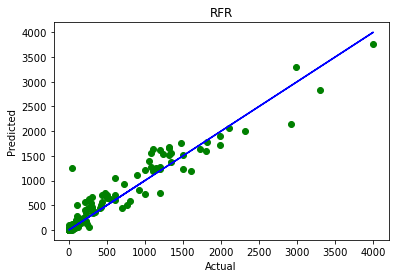

In [173]:
# Let's check how well our line is fitting to the test data
plt.scatter(x = y_test, y = rfr_pred, color = 'g')
plt.plot(y_test, y_test, color = 'b')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('RFR')
plt.plot()

**This is our best fitted line to the data.**

#### Regularization and Hyperparameter tuning

In [174]:
# importing required libraries

from sklearn.model_selection import GridSearchCV
# this is used to perform hyperparameter tuning

from sklearn.linear_model import Lasso
# we will use Lasso model for regularization

In [175]:
# making dictionary of different parameters to check the score for different parameters and find the best parameter
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1], 'random_state': list(range(10))}

# making instance of lasso
ls = Lasso()

# making instance to perform hyperparameter tuning
ht = GridSearchCV(ls, parameters)

In [176]:
# sending data for training to check if lasso is working well or not at best parameters
ht.fit(x_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [177]:
# finding best parameter and score
print('Best lasso parameter:', ht.best_params_)
print('Best score:', ht.best_score_)

Best lasso parameter: {'alpha': 1, 'random_state': 0}
Best score: 0.36067727765806923


**We can clearly see lasso model is also not working well.**

**Let's perform hyperparameter tuning for our model RandomForestRegressor**

In [179]:
# makign dictionary of parameters
params = {'n_estimators': [100, 200, 300, 400, 500], 'criterion':['squared_error', 'absolute_error', 'friedman_mse', 
           'poisson'], 'max_features': ['sqrt', 'log2']}

# making instance for tuning
tuning = GridSearchCV(rfr, params)

In [180]:
# sending data for training to check the model performance at best parameters
tuning.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [181]:
# finding best parameter and score
print('Best RFR parameter:', tuning.best_params_)
print('Best RFR score:', tuning.best_score_)

Best RFR parameter: {'criterion': 'friedman_mse', 'max_features': 'log2', 'n_estimators': 300}
Best RFR score: 0.83020125135644


**Observation: At best parameters the score is not more than the initially trained model.**

### Saving best model

In [182]:
# importing library
import joblib

In [183]:
joblib.dump(rfr, 'power_plant_capacity.obj')

['power_plant_capacity.obj']

### Loading the model

In [184]:
capacity = joblib.load('power_plant_capacity.obj')

In [185]:
# making prediction on test data
pred = capacity.predict(x_test)

In [187]:
# checking r2_score
print('R2_score:', (r2_score(pred, y_test))*100)

R2_score: 92.30425231884388


In [188]:
# making dataframe of predictions
pd.DataFrame([capacity.predict(x_test)[:], y_test[:]],index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181
Predicted,67.25,623.3078,35.281217,16.6265,58.2639,11.985,288.646,53.06,48.398,59.8575,12.977,45.917,38.877,82.62105,2.081,7.558,1645.85,20.333,1255.0028,110.3138,29.037,62.386,1240.5026,1182.85,65.99,7.91,363.87286,939.7028,711.48,15.967,74.785,1686.6,472.2126,1607.0,3770.9,13.367,32.872,27.388,1662.4416,32.48,425.43946,501.07584,44.649,1393.9,1238.089,1192.8066,106.0791,125.865,539.75636,37.2835,1773.8,25.539,1612.4458,1534.28,15.8665,1277.8124,28.1474,24.8266,754.9565,585.4995,19.586333,90.823,647.022,1752.2,131.1442,1634.1,50.74,398.43886,800.02466,131.994,1566.8,59.841,17.3087,665.39954,1564.7,1719.924,61.748,497.58274,469.18512,27.102263,6.751,58.376427,8.42325,36.773,3300.2,43.656222,13.94,1520.002,25.732,338.10458,31.233333,22.584,106.321,243.8416,438.698,437.97,47.522,20.904767,13.367,57.632,77.122,12.52,62.076,103.164,10.471,18.3679,21.6142,32.5084,5.0,21.5752,35.281217,1243.9755,16.435,38.318,503.70674,7.517,139.036,569.6546,349.22555,55.8577,6.659167,697.28,3.375,108.155,7.631833,37.0344,14.2715,16.7305,16.836,17.188,29.871338,2058.4,1897.925,24.72,97.5028,78.207,1051.3218,6.225333,74.35771,2827.5,10.31,22.927,73.8507,414.46758,1516.89,560.8018,32.474951,37.4988,9.458,95.8698,407.66,35.281217,16.768,2146.0,702.337,1379.665,48.409542,204.365,19.9372,7.91,723.15,747.7698,172.3922,18.655,241.06722,12.14,601.3834,1995.475,106.268,57.359,47.1675,1104.905,23.6225,117.9072,1270.4308,175.0089,439.23716,2.31,632.6702,38.56,11.48,1205.66
Original,120.00,270.0000,24.000000,25.5000,10.0000,5.000,110.000,30.00,10.000,99.0000,19.800,10.500,8.400,30.00000,5.000,3.000,1100.00,10.000,1140.0000,45.0000,7.200,66.000,1200.0000,1600.00,30.00,5.00,350.00000,726.6000,440.00,9.350,42.000,1320.0,300.0000,1800.0,4000.0,25.700,50.000,1.500,1320.0000,17.00,290.00000,101.00000,18.000,1050.0,1500.000,1110.0000,120.0000,35.000,291.00000,28.3000,1820.0,1.000,1200.0000,1240.00,5.0000,1200.0000,10.0000,12.5000,1200.0000,800.0000,30.500000,50.000,500.000,1470.0,94.2000,1720.0,30.00,210.00000,920.00000,75.000,1080.0,10.000,17.0000,300.00000,1340.0,1980.000,36.800,419.33000,420.00000,40.000000,3.000,50.400000,12.00000,22.000,2980.0,50.700000,5.00,1320.000,10.000,315.00000,25.000000,21.800,100.000,114.7500,250.000,412.02,78.900,11.600000,56.250,60.000,69.600,20.40,36.000,2.500,22.500,16.0000,24.0000,10.0000,5.0,30.0000,22.500000,37.6000,5.800,45.000,770.00000,40.000,160.000,440.0000,231.00000,270.0000,6.600000,500.00,21.000,126.000,1.000000,18.9000,9.9000,1.7000,50.400,10.000,15.000000,2100.0,1980.000,15.00,70.0000,51.000,600.0000,10.000000,30.00000,3300.0,16.00,20.000,25.0000,300.00000,1500.00,210.0000,15.000000,11.0000,16.950,90.0000,300.00,3.000000,5.000,2920.0,600.000,1340.000,50.400000,100.000,18.0000,5.00,1000.00,480.0000,220.0000,1.500,180.00000,5.00,600.0000,2320.000,96.000,63.500,37.5000,890.000,12.0000,234.0000,1080.0000,100.0000,702.86000,15.00,540.0000,50.00,11.20,1000.00


**Model is making predictions nearby the actual data for some input data.**